# Deep Learning Image Classifier for Male and Female

## Install dependencies

In [1]:
!pip install tensorflow opencv-python matplotlib

In [2]:
import tensorflow as tf
import os

In [3]:
# To optimize GPU usage of the Deep Learning Model
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

## Removing Unwanted Images (Data Cleaning)

In [4]:
# import open cv and img hdr
# open cv for computer vision
# img hdr for check for file extensions
import cv2
import imghdr

In [5]:
# Data set path
data_dir = 'data'

In [6]:
# list of image extensions
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [7]:
# Deleting Unwanted Image from data
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print(f'Image not in ext list {image_path}')
                os.remove(image_path)
        except Exception as e:
            print(f'Issue with image {image_path}')

## Loading Data

In [8]:
import numpy as np
from matplotlib import pyplot as plt

In [9]:
# load our dataset into tensor flow dataset pipeline
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 715 files belonging to 2 classes.


In [10]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

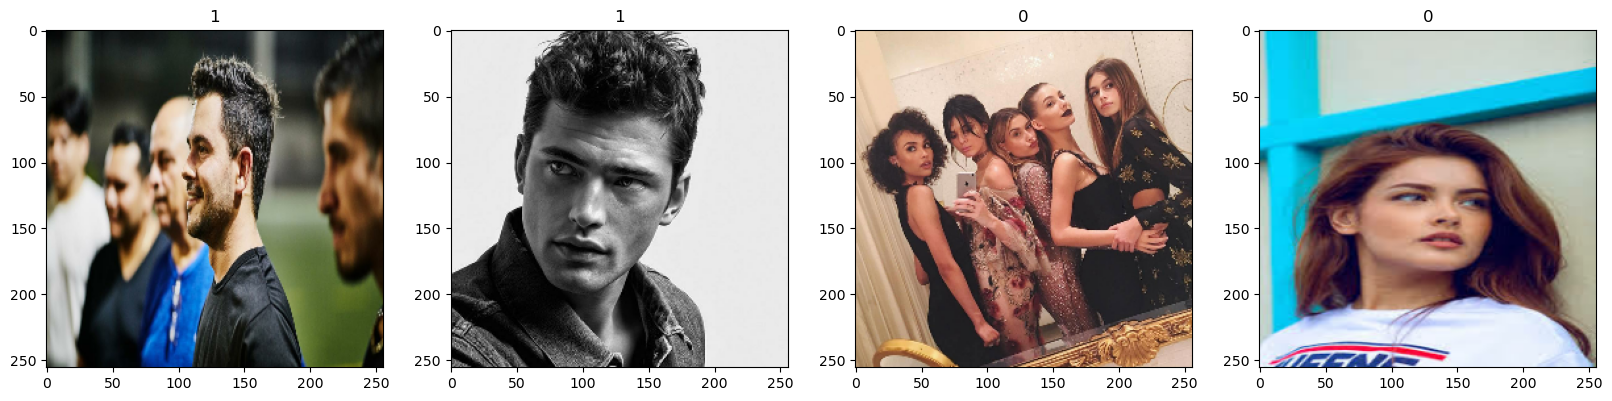

In [11]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

batch 0 = female<br>
batch 1 = male

## Preprocessing

### Data Scaling

In [12]:
# Converting 255 color values to 0 - 1 values
data = data.map(lambda x, y: (x/255, y))
scaled_data_iterator = data.as_numpy_iterator()

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


### Splitting the Data

In [13]:
len(data)

23

In [14]:
# Training Data Set Size
train_size = int(len(data) * .7)
# Validation Data Set Size
val_size =  int(len(data) * .2)
# Test Data Set Size
test_size = int(len(data) * .1) + 1

# Total Size
total_size = train_size+val_size+test_size

In [15]:
print(f'Train Size: {train_size}\nValidation Size: {val_size}\nTest Size: {test_size}\nTotal Size: {total_size}')

Train Size: 16
Validation Size: 4
Test Size: 3
Total Size: 23


In [16]:
# Take indicates how much data we are going to take in a particular partition
# Take data
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## Deep Model

### Building the Deep Learning Model

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [18]:
model = Sequential()

In [19]:
# Adding Layers

# 3 Convolutional Layer
# Relu Activation
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

# 1 Flatten Layer
model.add(Flatten())

# 1 Denser Layer
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [20]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

### Training the Model

In [22]:
# log directory
logdir = 'logs'

In [23]:
# Tensorboard logs
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [24]:
# Fit = Train, Predict = Make predictions
hist = model.fit(train, epochs=50, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/50
16/16 [==============================] - 19s 1s/step - loss: 0.8284 - accuracy: 0.5176 - val_loss: 0.6918 - val_accuracy: 0.6953
Epoch 2/50
16/16 [==============================] - 19s 1s/step - loss: 0.6918 - accuracy: 0.5898 - val_loss: 0.6862 - val_accuracy: 0.7266
Epoch 3/50
16/16 [==============================] - 19s 1s/step - loss: 0.6834 - accuracy: 0.6074 - val_loss: 0.6687 - val_accuracy: 0.6172
Epoch 4/50
16/16 [==============================] - 18s 1s/step - loss: 0.6611 - accuracy: 0.6562 - val_loss: 0.6127 - val_accuracy: 0.6562
Epoch 5/50
16/16 [==============================] - 19s 1s/step - loss: 0.6056 - accuracy: 0.7051 - val_loss: 0.6156 - val_accuracy: 0.6016
Epoch 6/50
16/16 [==============================] - 18s 1s/step - loss: 0.4937 - accuracy: 0.7559 - val_loss: 0.4390 - val_accuracy: 0.7891
Epoch 7/50
16/16 [==============================] - 18s 1s/step - loss: 0.3674 - accuracy: 0.8516 - val_loss: 0.3904 - val_accuracy: 0.8203
Epoch 8/50
16/16 [==

## Perfomance

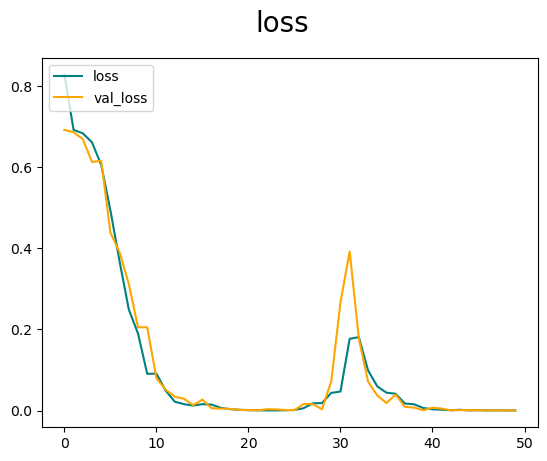

In [25]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

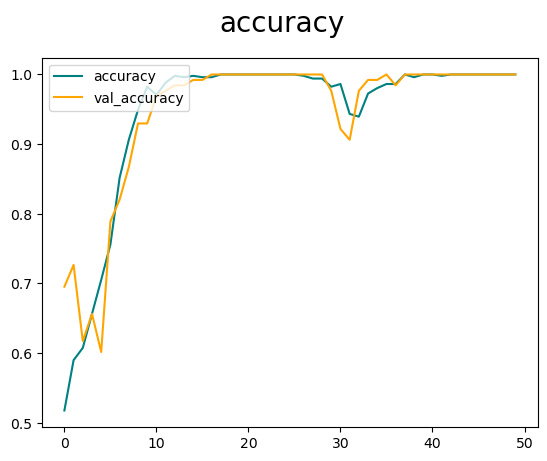

In [26]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

## Evaluating Perfomance

In [27]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [28]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [29]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 178ms/step


In [30]:
print(f'Precision: {pre.result().numpy() * 100}%\nRecall: {re.result().numpy() * 100}%\nAccuracy: {acc.result().numpy() * 100}%')

Precision: 100.0%
Recall: 100.0%
Accuracy: 100.0%


## Test

In [31]:
def predict(n: float):
    if n > 0.5:
        print(f"Predicted class is a Male")
    else:
        print(f'Predicted class is Female')

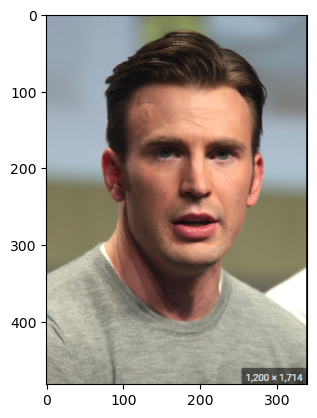

In [42]:
img = cv2.imread('./test/chris.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

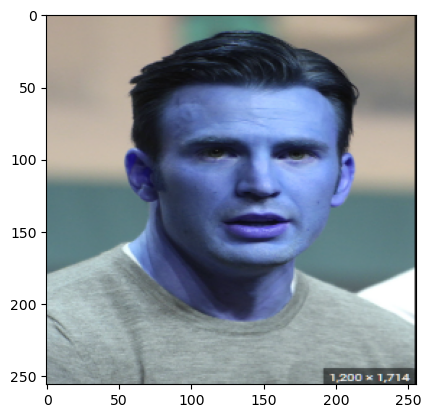

In [43]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [44]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 55ms/step


In [45]:
predict(yhat)

Predicted class is a Male


In [46]:
print(f'{(yhat[0][0] * 100)}%')

92.20466613769531%


## Saving the Model

In [40]:
from tensorflow.keras.models import load_model

In [41]:
model.save(os.path.join('models', 'gender_classification_model.h5'))